### George's Voyage into Thomas's Code
---

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt 

pd.set_option('display.max_rows', 500)

---
#### test if data pipeline works for deposit v1 features

In [2]:
v1_features = ['transaction_amount', 'fico_score', 'vantage_score',
            'fraud_score_1', 'fraud_score_2', 'email_risk_score', 'phone_risk_score',  'all8220', 
            'iqt9415', 'all7120', 'mtf5820', 'bcc7120', 'bcc2800', 'iln5520', 'bcx3423', 'stu5031',
            'nr_direct_deposits', 'nr_past_returns', 'rolling_trns_as_pct_of_bal', 
            'nr_transactions_per_day', 'transaction_as_pct_of_balance', 
            'transaction_as_pct_of_bal_min', 'rolling_mean_acc_bal', 
              'real_ending_balance', # old 'account_ending_balance'
              'days_since_first_deposit' # old 'days_since_first_transaction'
              ]

In [3]:
df = pd.read_feather('../data/labeled/labeled_1597354481.feather')
display(df[v1_features].head())
df.shape

,transaction_amount,fico_score,vantage_score,fraud_score_1,fraud_score_2,email_risk_score,phone_risk_score,all8220,iqt9415,all7120,...,stu5031,nr_direct_deposits,nr_past_returns,rolling_trns_as_pct_of_bal,nr_transactions_per_day,transaction_as_pct_of_balance,transaction_as_pct_of_bal_min,rolling_mean_acc_bal,real_ending_balance,days_since_first_deposit
0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,NaN,NaN,inf,NaN,500.000000,500.00,0
1,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,0.019838,1.409091,0.155186,-0.000972,489.379412,558.29,22
2,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,1,0.073134,1.095238,0.237942,-0.093423,470.270000,520.27,42
3,125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,1,0.088327,1.093023,0.240260,-0.093423,483.731538,645.27,43
4,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,1,0.092693,1.113636,0.232641,-0.093423,512.270000,794.77,44


(559465, 173)

In [4]:
# # load data built using the data script
# df = pd.read_feather('../data/labeled_new_features/label_new_features_1596581849.feather')

In [5]:
df.head()

,index,transaction_datetime,user_id,business_account_number,transaction_code,is_return,transaction_amount,endbal,external_account_number,real_ending_balance,...,nr_returns_all_time,days_to_acc_close,account_closed_by_risk_in_next_90d,is_chg_wrt_off_in_90d,nr_returns_in_next_90d,bal_after_90d,tamt_abs,is_returned,target,indeterminate
0,0,2017-12-13 16:26:31,65740,410000007044,ACHDD,False,500.0,500.00,80001475699,500.00,...,1,NaN,False,False,1.0,2386.24,500.0,False,False,False
1,1,2018-01-04 18:43:31,65740,410000007044,ACHDD,False,75.0,558.29,80001475699,558.29,...,1,NaN,False,False,1.0,3887.73,75.0,False,False,False
2,3,2018-01-24 20:14:12,65740,410000007044,ACHDD,False,100.0,520.27,80001475699,520.27,...,1,NaN,False,False,0.0,903.40,100.0,False,False,False
3,4,2018-01-26 10:53:36,65740,410000007044,ACHDD,False,125.0,645.27,80001475699,645.27,...,1,NaN,False,False,0.0,903.40,125.0,False,False,False
4,5,2018-01-27 12:10:55,65740,410000007044,ACHDD,False,150.0,794.77,80001475699,794.77,...,1,NaN,False,False,0.0,1400.27,150.0,False,False,False


In [6]:
df.describe()

,index,user_id,business_account_number,transaction_amount,endbal,real_ending_balance,borrower_id,bal,afdep,fico_score,...,nr_transactions_per_day,transaction_as_pct_of_balance_abs,rolling_trns_as_pct_of_bal,transaction_as_pct_of_bal_min,nr_transactions_all_time,nr_returns_all_time,days_to_acc_close,nr_returns_in_next_90d,bal_after_90d,tamt_abs
count,559465.000000,5.594650e+05,5.594650e+05,559465.000000,5.594650e+05,5.594650e+05,5.594650e+05,5.594650e+05,559465.000000,460756.000000,...,4.360230e+05,5.594650e+05,4.352110e+05,4.352110e+05,559465.000000,559465.000000,24797.000000,559465.000000,5.594650e+05,559465.000000
mean,287422.005419,1.102539e+07,4.100021e+11,1726.013743,6.764787e+03,7.721934e+03,6.264583e+06,5.368865e+03,1694.257143,937.351837,...,inf,inf,3.179543e+02,2.514124e+02,155.607967,0.202810,126.874864,0.112273,8.726441e+03,1726.013743
std,166207.341350,5.317987e+06,1.447335e+06,6036.923293,2.298736e+04,2.429341e+04,2.881614e+06,2.153421e+04,5669.611026,1306.261356,...,NaN,NaN,1.716441e+04,1.643359e+04,250.284310,1.532451,122.123808,1.276792,2.903319e+04,6036.923293
min,0.000000,1.880000e+02,4.100000e+11,1.000000,-3.532104e+04,-3.532104e+04,4.000000e+01,-6.398120e+04,0.000000,388.000000,...,1.492537e-03,4.043487e-06,0.000000e+00,-3.333333e+04,1.000000,0.000000,-1.000000,0.000000,-6.398120e+04,1.000000
25%,142800.000000,1.044316e+07,4.100008e+11,100.000000,1.300000e+02,1.500000e+02,4.295197e+06,8.060000e+00,86.800000,683.000000,...,1.046512e-01,1.296059e-01,8.172199e-02,-1.557771e-01,19.000000,0.000000,41.000000,0.000000,7.895000e+01,100.000000
50%,288494.000000,1.352323e+07,4.100019e+11,200.000000,8.752100e+02,1.000670e+03,7.340138e+06,3.032100e+02,100.000000,747.000000,...,2.352941e-01,7.595573e-01,2.850578e-01,1.153910e-04,60.000000,0.000000,78.000000,0.000000,1.000040e+03,200.000000
75%,430069.000000,1.460878e+07,4.100030e+11,1000.000000,4.748820e+03,5.702880e+03,8.424548e+06,3.053720e+03,650.000000,789.000000,...,5.555556e-01,2.500000e+02,1.041339e+00,3.113277e-01,185.000000,0.000000,186.000000,0.000000,6.492710e+03,1000.000000
max,577274.000000,1.635652e+07,4.100059e+11,1000000.000000,1.391851e+06,1.391851e+06,1.018133e+07,1.146741e+06,442500.000000,9003.000000,...,inf,inf,5.000000e+06,5.000000e+06,3567.000000,79.000000,854.000000,79.000000,3.375345e+06,1000000.000000


In [7]:
print(df.columns)

Index(['index', 'transaction_datetime', 'user_id', 'business_account_number',
       'transaction_code', 'is_return', 'transaction_amount', 'endbal',
       'external_account_number', 'real_ending_balance',
       ...
       'nr_returns_all_time', 'days_to_acc_close',
       'account_closed_by_risk_in_next_90d', 'is_chg_wrt_off_in_90d',
       'nr_returns_in_next_90d', 'bal_after_90d', 'tamt_abs', 'is_returned',
       'target', 'indeterminate'],
      dtype='object', length=173)


<AxesSubplot:>

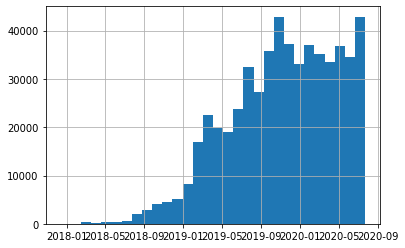

In [8]:
df.transaction_datetime.hist(bins=30)

In [9]:
modeling_df = df[df["transaction_datetime"].between(pd.to_datetime('2019-01-16'),
                                                    pd.to_datetime('2020-02-14'))]

In [10]:
test_df1 = df[df["transaction_datetime"].between(pd.to_datetime('2020-03-01'),
                                                 pd.to_datetime('2020-04-01'))]
test_df2 = df[df["transaction_datetime"].between(pd.to_datetime('2020-04-01'),
                                                 pd.to_datetime('2020-05-01'))]

<AxesSubplot:>

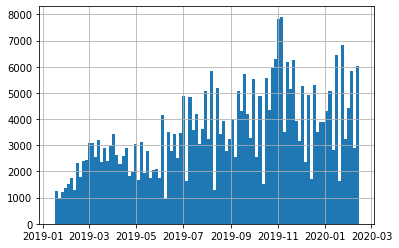

In [11]:
modeling_df.transaction_datetime.hist(bins=100)

In [12]:
modeling_df[['target', 'indeterminate']].value_counts()

target  indeterminate
False   False            336115
True    False              5896
        True               4190
False   True               3412
dtype: int64

In [14]:
# one way to remove indeterminate
modeling_df['target_noind'] = modeling_df['target'] & ~modeling_df['indeterminate']

/home/ec2-user/anaconda3/envs/ml_basic_py37/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [15]:
modeling_df['target_noind'].value_counts()

False    343717
True       5896
Name: target_noind, dtype: int64

<AxesSubplot:>

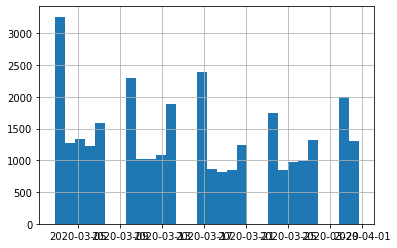

In [16]:
test_df1.transaction_datetime.hist(bins=30)

In [17]:
features = ['transaction_amount', 'real_ending_balance', 'fico_score', 
            'vantage_score', 'all7120', 'all8220', 'bcc2800', 'bcc7120', 
            'bcx3423', 'iln5520', 'iqt9413', 'iqt9415', 'mtf5820', 'stu5031', 
            'credit_card_loan_amount', 'delinquencies_90_days', 'education_loan_amount',
            'mortgage_loan_amount', 'secured_loan_amount', 'total_outstanding_balance', 
            'total_tradelines_open', 'unsecured_loan_amount', 'giact_is_pass', 
            'giact_is_decline', 'giact_is_other', 'giact_nr_pass', 'giact_nr_decline',
            'giact_nr_other', 'fraud_score_1', 'fraud_score_2', 'address_risk_score', 
            'email_risk_score', 'phone_risk_score', 'name_address_correlation', 
            'name_email_correlation', 'name_phone_correlation', 'nr_social_profiles_found', 
            'days_since_first_deposit', 'lag_acc_open_first_transaction', 'first_deposit_amount', 
            'giact_time_since_first_link', 'giact_time_since_last_link', 'transaction_as_pct_of_balance', 
            'time_since_last_transaction', 'nr_past_returns', 'nr_returns_30d', 'nr_past_deposits',
            'nr_deposits_3d', 'nr_deposits_30d', 'nr_past_transactions', 'nr_transactions_3d',
            'nr_transactions_30d', 'pct_returned_deposits', 'pct_returned_deposits_30d',
            'nr_transactions_30d_div_nr_past_transactions', 'mean_account_balance_3d',
            'mean_account_balance_30d', 'std_account_balance_3d', 'std_account_balance_30d', 
            'sum_deposits_3d', 'sum_deposits_10d', 'sum_deposits_30d', 'sum_withdrawals_3d', 
            'sum_withdrawals_10d', 'sum_withdrawals_30d', 'mean_deposits_10d', 
            'mean_deposits', 'mean_deposits_10d_div_mean_deposits', 'mean_withdrawals_10d', 
            'mean_withdrawals', 'mean_withdrawals_10d_div_mean_withdrawals', 'max_deposits_3d', 
            'max_deposits_10d', 'max_deposits_10d_div_mean_deposits',
            'max_deposits_10d_div_mean_account_balance_30d', 'max_withdrawals', 
            'max_withdrawals_3d', 'max_withdrawals_10d', 'max_withdrawals_10d_div_mean_withdrawals',
            'nr_trans_ratio', 'bal_ratio', 'deposits_ratio', 'nr_direct_deposits', 'dollar_val_dd']

In [18]:
len(features)

84

In [19]:
df['business_account_number']

0         410000007044
1         410000007044
2         410000007044
3         410000007044
4         410000007044
              ...     
559460    410005924452
559461    410005924564
559462    410005924591
559463    410005924602
559464    410005924704
Name: business_account_number, Length: 559465, dtype: int64

In [18]:
cat_features = ['mzip', 'mstate', 'external_institution_id', 'external_account_number']

In [24]:
import lightgbm as lgb
from sklearn.model_selection import GroupKFold
from sklearn.metrics import roc_auc_score

def train_lgb_baseline_grouped(df, features, params, target_col_name='target', group_col_name='business_account_number', num_folds=5, seed=12345, 
                               n_boost_rounds=100000, early_stopping_rounds=1000, verbose_eval=500, weight_col_name=None, cat_features=None, prepro=None):
    """
    Train LightGBM models over 5 folds, return OOF predictions, trained models, and average AUC over 5 folds.
    """
    kf = GroupKFold(num_folds)
    split = kf.split(X=df, y=df[target_col_name], groups=df[group_col_name])

    train_pred = np.zeros(len(df))
    feature_importance_df = pd.DataFrame()

    models = []

    for i, (train_idx, test_idx) in enumerate(split):
        train = df.iloc[train_idx].copy()
        test = df.iloc[test_idx].copy()

        if weight_col_name:
            wtr = train[weight_col_name]
            wts = test[weight_col_name]
        else:
            wtr = None
            wts = None
            
        if prepro is not None:
            preprocessor = prepro
            train[cat_features] = prepro.fit_transform(X=train[cat_features], y=train[target_col_name])
            test[cat_features] = prepro.transform(test[cat_features])

        lgb_train = lgb.Dataset(train[features],
                                label=train[target_col_name],
                                free_raw_data=False,
                                weight=wtr)
        lgb_test = lgb.Dataset(test[features],
                               label=test[target_col_name],
                               free_raw_data=False,
                               weight=wts)

        model = lgb.train(params,
                          lgb_train,
                          valid_sets=[lgb_train, lgb_test],
                          valid_names=['train', 'test'],
                          num_boost_round=n_boost_rounds,
                          early_stopping_rounds= early_stopping_rounds,
                          verbose_eval=verbose_eval)
        models.append(model)

        train_pred[test_idx] = model.predict(test[features], num_iteration=model.best_iteration)

        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = features
        fold_importance_df["importance"] = model.feature_importance(importance_type='gain', 
                                                                    iteration=model.best_iteration)
        fold_importance_df["fold"] = i + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

    auc = roc_auc_score(y_true=df[target_col_name].values, y_score=train_pred)

    return train_pred, feature_importance_df, models, auc

In [25]:
modeling_df.columns[-10:]

Index(['days_to_acc_close', 'account_closed_by_risk_in_next_90d',
       'is_chg_wrt_off_in_90d', 'nr_returns_in_next_90d', 'bal_after_90d',
       'tamt_abs', 'is_returned', 'target', 'indeterminate', 'target_noind'],
      dtype='object')

In [26]:
modeling_df.target_noind.value_counts()

False    343717
True       5896
Name: target_noind, dtype: int64

In [27]:
df.business_account_number.nunique()

133365

In [28]:
# sbusiness_account_numbere we have imbalanced data we scale our data so that the positive class has equal weight to negative class
count_pos = modeling_df['target_noind'].sum()
count_neg = (~modeling_df['target_noind']).sum()
pos_wgt_scaling_factor = (count_neg + count_pos) / count_pos

# Increase weight of accounts that are bad and have no returns (yet)
#modeling_df['sample_weight'] = np.where((modeling_df['nr_returns_30d'] == 0) & modeling_df['target'], 4, 1) * np.where(modeling_df['sample_date'] < pd.to_datetime('2019-04-15'), 0.75, 1)

In [29]:
pos_wgt_scaling_factor

59.29664179104478

In [30]:
modeling_df[['giact_is_pass', 'giact_is_decline', 'giact_is_other']] = modeling_df[['giact_is_pass', 'giact_is_decline', 'giact_is_other']].astype(bool)

In [31]:
from category_encoders import TargetEncoder

tgt = TargetEncoder().fit_transform(modeling_df[cat_features], modeling_df.target)
tgt.head()

/home/ec2-user/anaconda3/envs/ml_basic_py37/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,mzip,mstate,external_institution_id,external_account_number
215,0.027778,0.028427,0.023517,0.028849
225,0.000193,0.030814,0.023517,0.007759
226,0.000193,0.030814,0.023517,0.007759
244,0.032558,0.018391,0.026613,0.035714
245,0.032558,0.018391,0.026613,0.035714


#### With TargetEncoder

In [32]:
from category_encoders import TargetEncoder

seed = 12345
params = {
    "objective" : "binary",
    "metric" : "auc",
    "boosting": 'gbdt',
    "max_depth" : 4,
    "num_leaves" : 16,
    "learning_rate" : 0.03,
    "feature_fraction" : 0.8,
    "lambda_l1": 14,
    "lambda_l2": 14,
    "min_data_in_leaf": 50,
    "scale_pos_weight": pos_wgt_scaling_factor,
    "tree_learner": "serial",
    "boost_from_average": "false",
    "bagging_seed" : seed,
    "verbosity" : 1,
    "seed": seed
}

pred, feature_importance_df, models, auc = train_lgb_baseline_grouped(modeling_df, features, params, target_col_name='target_noind', 
                                                                      group_col_name='business_account_number', seed=seed, 
                                                                      n_boost_rounds=5000, early_stopping_rounds=250, verbose_eval=500, 
                                                                      weight_col_name=None, cat_features=cat_features, prepro=TargetEncoder())

/home/ec2-user/anaconda3/envs/ml_basic_py37/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Training until validation scores don't improve for 250 rounds
[500]	train's auc: 0.991825	test's auc: 0.977003
Early stopping, best iteration is:
[610]	train's auc: 0.992658	test's auc: 0.977207


/home/ec2-user/anaconda3/envs/ml_basic_py37/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Training until validation scores don't improve for 250 rounds
[500]	train's auc: 0.990982	test's auc: 0.984055
Early stopping, best iteration is:
[591]	train's auc: 0.991657	test's auc: 0.984092


/home/ec2-user/anaconda3/envs/ml_basic_py37/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Training until validation scores don't improve for 250 rounds
[500]	train's auc: 0.991418	test's auc: 0.982804
[1000]	train's auc: 0.994365	test's auc: 0.983027
Early stopping, best iteration is:
[775]	train's auc: 0.993425	test's auc: 0.983174


/home/ec2-user/anaconda3/envs/ml_basic_py37/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Training until validation scores don't improve for 250 rounds
[500]	train's auc: 0.991238	test's auc: 0.983371
[1000]	train's auc: 0.994127	test's auc: 0.983454
Early stopping, best iteration is:
[859]	train's auc: 0.993491	test's auc: 0.983576


/home/ec2-user/anaconda3/envs/ml_basic_py37/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Training until validation scores don't improve for 250 rounds
[500]	train's auc: 0.991727	test's auc: 0.981249
Early stopping, best iteration is:
[700]	train's auc: 0.993028	test's auc: 0.981319


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

def display_importances(feature_importance_df_, save_file_path=None):
    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:40].index
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]

    fig = plt.figure(figsize=(14, 12))

    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    if save_file_path:
        plt.savefig(save_file_path)

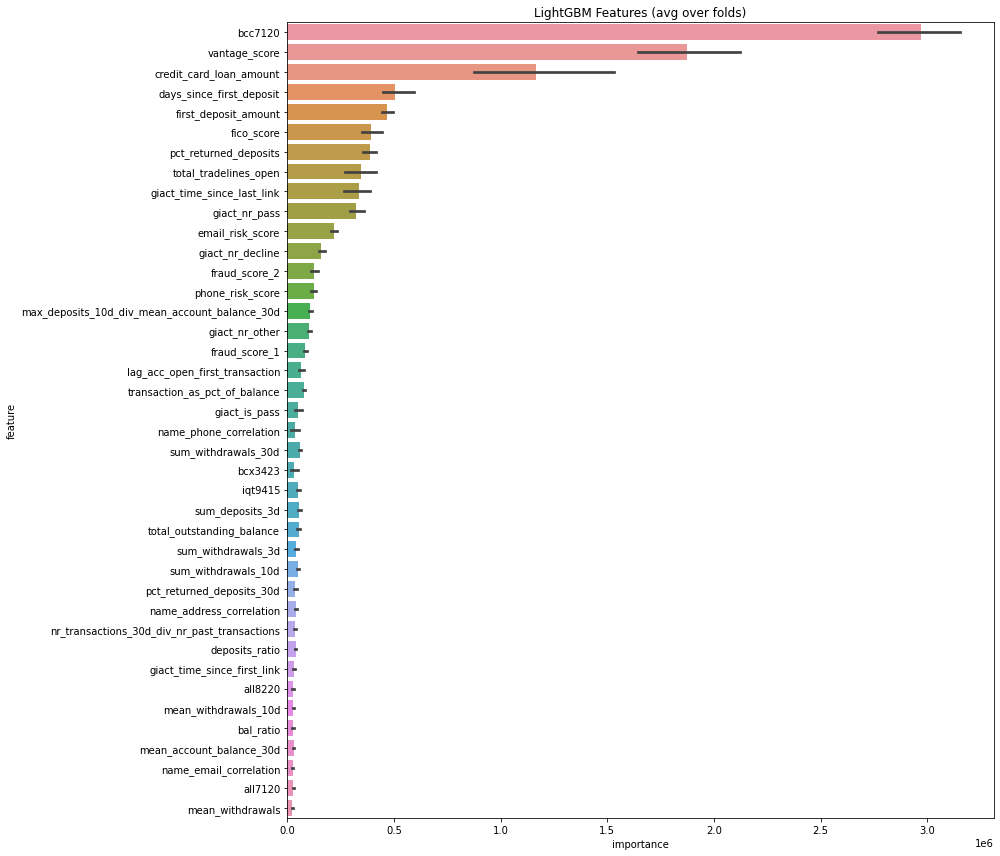

In [34]:
display_importances(feature_importance_df)

/home/ec2-user/anaconda3/envs/ml_basic_py37/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


target_noind
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: pred, dtype: object

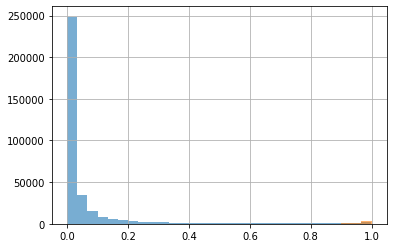

In [35]:
modeling_df['pred'] = pred
modeling_df.groupby('target_noind')['pred'].hist(bins=30, alpha=0.6)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'2-class Precision-Recall curve: AP = 0.6451788645994349'}, xlabel='Recall', ylabel='Precision'>)

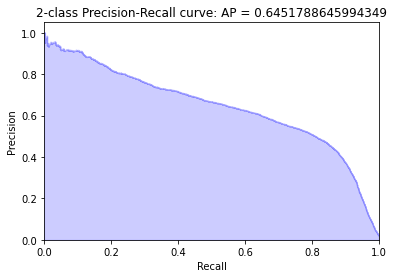

In [36]:
from rdsutils.plot import plot_pr_curve

plot_pr_curve(y_true = modeling_df['target_noind'], y_score=pred)

In [37]:
def get_best_features(feature_importance_df_):
    return feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:40]

best_features_v2 = get_best_features(feature_importance_df)

In [38]:
best_features_v2

,importance
feature,
bcc7120,2.969065e+06
vantage_score,1.874522e+06
credit_card_loan_amount,1.165976e+06
days_since_first_deposit,5.046954e+05
first_deposit_amount,4.679522e+05
fico_score,3.947268e+05
pct_returned_deposits,3.860474e+05
total_tradelines_open,3.481685e+05
giact_time_since_last_link,3.358214e+05


#### Deposit V1 model
---
Build a baseline using the deposit v1 model features

In [39]:
v1_features = ['transaction_amount', 'fico_score', 'vantage_score',
            'fraud_score_1', 'fraud_score_2', 'email_risk_score', 'phone_risk_score',  'all8220', 
            'iqt9415', 'all7120', 'mtf5820', 'bcc7120', 'bcc2800', 'iln5520', 'bcx3423', 'stu5031',
            'nr_direct_deposits', 'nr_past_returns', 'rolling_trns_as_pct_of_bal', 
            'nr_transactions_per_day', 'transaction_as_pct_of_balance', 
            'transaction_as_pct_of_bal_min', 'rolling_mean_acc_bal', 
              'real_ending_balance', # old 'account_ending_balance'
              'days_since_first_deposit' # old 'days_since_first_transaction'
              ]

In [40]:
from category_encoders import TargetEncoder

seed = 12345
params = {
    "objective" : "binary",
    "metric" : "auc",
    "boosting": 'gbdt',
    "max_depth" : 4,
    "num_leaves" : 16,
    "learning_rate" : 0.03,
    "feature_fraction" : 0.8,
    "lambda_l1": 14,
    "lambda_l2": 14,
    "min_data_in_leaf": 50,
    "scale_pos_weight": pos_wgt_scaling_factor,
    "tree_learner": "serial",
    "boost_from_average": "false",
    "bagging_seed" : seed,
    "verbosity" : 1,
    "seed": seed
}

pred_v1, feature_importance_df_v1, models_v1, auc_v1 = train_lgb_baseline_grouped(modeling_df, v1_features, params, target_col_name='target_noind', 
                                                                      group_col_name='business_account_number', seed=seed, 
                                                                      n_boost_rounds=5000, early_stopping_rounds=250, verbose_eval=500, 
                                                                      weight_col_name=None)

Training until validation scores don't improve for 250 rounds
[500]	train's auc: 0.986602	test's auc: 0.970568
Early stopping, best iteration is:
[397]	train's auc: 0.985094	test's auc: 0.970642
Training until validation scores don't improve for 250 rounds
[500]	train's auc: 0.98579	test's auc: 0.975985
Early stopping, best iteration is:
[410]	train's auc: 0.984601	test's auc: 0.976179
Training until validation scores don't improve for 250 rounds
[500]	train's auc: 0.98599	test's auc: 0.97495
[1000]	train's auc: 0.990106	test's auc: 0.97523
Early stopping, best iteration is:
[938]	train's auc: 0.989789	test's auc: 0.975329
Training until validation scores don't improve for 250 rounds
[500]	train's auc: 0.985522	test's auc: 0.978157
Early stopping, best iteration is:
[624]	train's auc: 0.986924	test's auc: 0.97831
Training until validation scores don't improve for 250 rounds
[500]	train's auc: 0.986042	test's auc: 0.974275
Early stopping, best iteration is:
[547]	train's auc: 0.986676	t

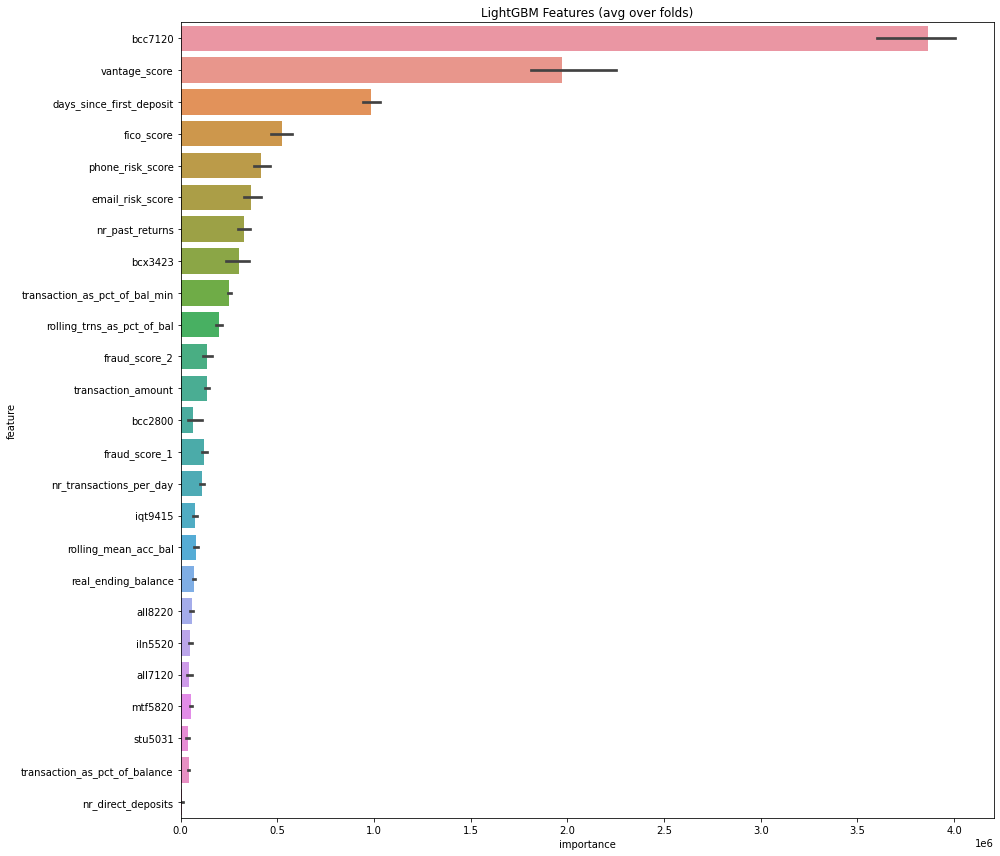

In [41]:
# why don't we use nr_past_returns anymore
display_importances(feature_importance_df_v1)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'2-class Precision-Recall curve: AP = 0.507015418086608'}, xlabel='Recall', ylabel='Precision'>)

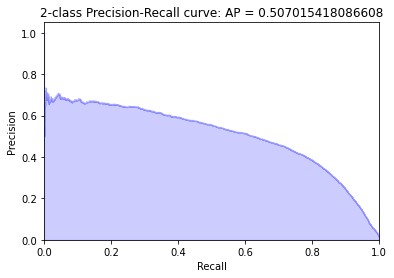

In [42]:
from rdsutils.plot import plot_pr_curve

plot_pr_curve(y_true = modeling_df['target_noind'], y_score=pred_v1)

#### Cross-model study
---

In [43]:
def get_best_features(feature_importance_df_):
    return feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:40]

best_features_v2 = get_best_features(feature_importance_df)
best_features_v1 = get_best_features(feature_importance_df_v1)

In [44]:
best_features_v1['rank'] = np.arange(len(best_features_v1))
best_features_v2['rank'] = np.arange(len(best_features_v2))

In [45]:
best_features = pd.concat([best_features_v1, best_features_v2])
best_features = best_features.groupby('feature').mean().sort_values('rank', ascending=True)
best_features.head(10)

,importance,rank
feature,,
bcc7120,3.415868e+06,0.0
vantage_score,1.924147e+06,1.0
credit_card_loan_amount,1.165976e+06,2.0
days_since_first_deposit,7.441558e+05,2.5
first_deposit_amount,4.679522e+05,4.0
fico_score,4.582783e+05,4.0
pct_returned_deposits,3.860474e+05,6.0
nr_past_returns,3.275239e+05,6.0
total_tradelines_open,3.481685e+05,7.0


In [46]:
def diff(seq1, seq2):
    # we want to ensure order...
    return [e1 for e1 in seq1 if e1 not in seq2]

print(diff(best_features_v1.index,
           best_features_v2.index))

['nr_past_returns', 'transaction_as_pct_of_bal_min', 'rolling_trns_as_pct_of_bal', 'transaction_amount', 'nr_transactions_per_day', 'rolling_mean_acc_bal', 'real_ending_balance', 'bcc2800', 'mtf5820', 'iln5520', 'stu5031', 'nr_direct_deposits']


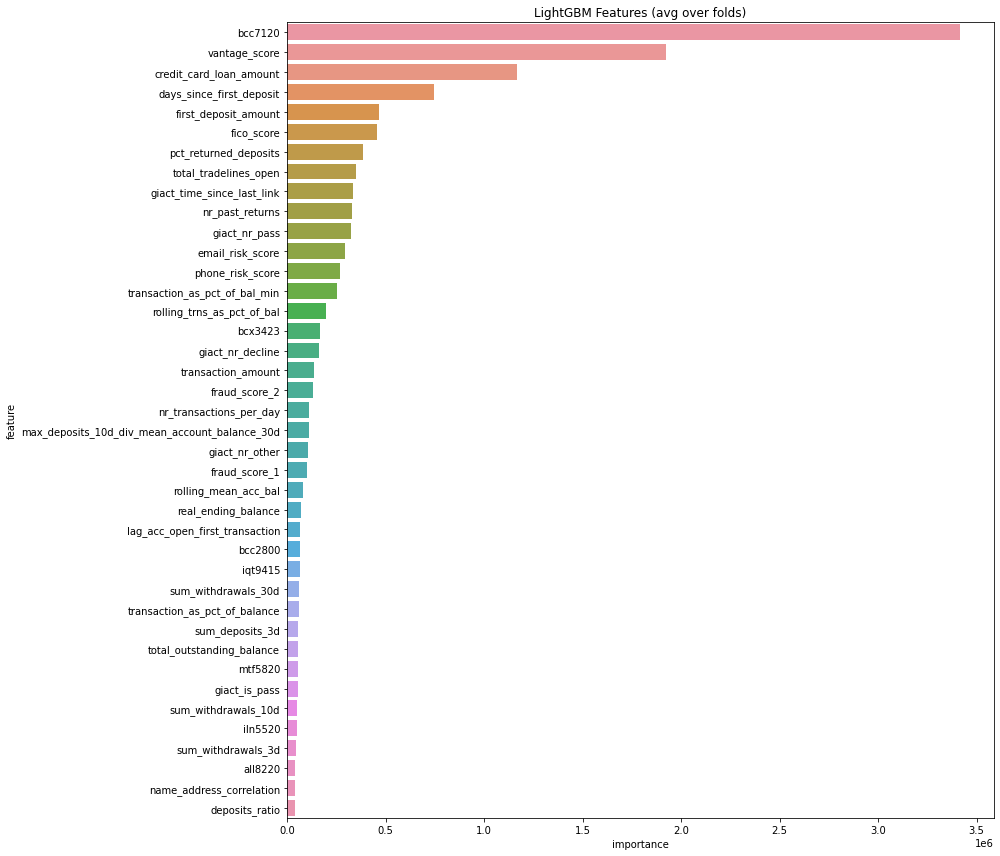

In [47]:
display_importances(best_features.reset_index())

In [48]:
best_feature_cols = best_features.index.tolist()

In [49]:
from category_encoders import TargetEncoder

seed = 12345
params = {
    "objective" : "binary",
    "metric" : "auc",
    "boosting": 'gbdt',
    "max_depth" : 4,
    "num_leaves" : 16,
    "learning_rate" : 0.03,
    "feature_fraction" : 0.8,
    "lambda_l1": 14,
    "lambda_l2": 14,
    "min_data_in_leaf": 50,
    "scale_pos_weight": pos_wgt_scaling_factor,
    "tree_learner": "serial",
    "boost_from_average": "false",
    "bagging_seed" : seed,
    "verbosity" : 1,
    "seed": seed
}

pred, feature_importance_df, models, auc = train_lgb_baseline_grouped(modeling_df, best_feature_cols, params, target_col_name='target_noind', 
                                                                      group_col_name='business_account_number', seed=seed, 
                                                                      n_boost_rounds=5000, early_stopping_rounds=250, verbose_eval=500, 
                                                                      weight_col_name=None, cat_features=cat_features, prepro=TargetEncoder())

/home/ec2-user/anaconda3/envs/ml_basic_py37/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Training until validation scores don't improve for 250 rounds
[500]	train's auc: 0.991909	test's auc: 0.978132
Early stopping, best iteration is:
[572]	train's auc: 0.992464	test's auc: 0.978211


/home/ec2-user/anaconda3/envs/ml_basic_py37/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Training until validation scores don't improve for 250 rounds
[500]	train's auc: 0.990901	test's auc: 0.984208
Early stopping, best iteration is:
[596]	train's auc: 0.991751	test's auc: 0.98434


/home/ec2-user/anaconda3/envs/ml_basic_py37/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Training until validation scores don't improve for 250 rounds
[500]	train's auc: 0.991579	test's auc: 0.982505
Early stopping, best iteration is:
[685]	train's auc: 0.99306	test's auc: 0.982739


/home/ec2-user/anaconda3/envs/ml_basic_py37/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Training until validation scores don't improve for 250 rounds
[500]	train's auc: 0.991395	test's auc: 0.98352
[1000]	train's auc: 0.99423	test's auc: 0.983951
Early stopping, best iteration is:
[951]	train's auc: 0.994057	test's auc: 0.983976


/home/ec2-user/anaconda3/envs/ml_basic_py37/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Training until validation scores don't improve for 250 rounds
[500]	train's auc: 0.991712	test's auc: 0.981366
[1000]	train's auc: 0.994384	test's auc: 0.981568
Early stopping, best iteration is:
[824]	train's auc: 0.99368	test's auc: 0.981796


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'2-class Precision-Recall curve: AP = 0.6470492110281215'}, xlabel='Recall', ylabel='Precision'>)

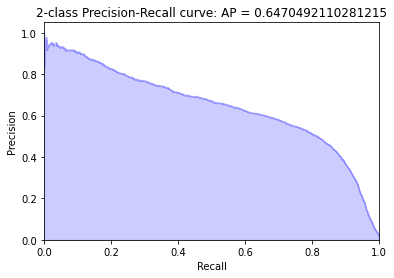

In [50]:
from rdsutils.plot import plot_pr_curve

plot_pr_curve(y_true = modeling_df['target_noind'], y_score=pred)

#### Difference in features
---

In [51]:
best_features_v1, best_features_v2, best_feature_cols

(                                 importance  rank
 feature                                          
 bcc7120                        3.862672e+06     0
 vantage_score                  1.973772e+06     1
 days_since_first_deposit       9.836163e+05     2
 fico_score                     5.218298e+05     3
 phone_risk_score               4.138316e+05     4
 email_risk_score               3.661043e+05     5
 nr_past_returns                3.275239e+05     6
 bcx3423                        3.004338e+05     7
 transaction_as_pct_of_bal_min  2.521945e+05     8
 rolling_trns_as_pct_of_bal     1.968795e+05     9
 fraud_score_2                  1.373607e+05    10
 transaction_amount             1.371255e+05    11
 fraud_score_1                  1.224862e+05    12
 nr_transactions_per_day        1.100283e+05    13
 rolling_mean_acc_bal           7.961709e+04    14
 iqt9415                        7.383084e+04    15
 real_ending_balance            6.852482e+04    16
 bcc2800                       

#### Testing

In [52]:
def train_validate_lgb(df_train, df_test, features, params, target_col_name='target', seed=12345, 
                       n_boost_rounds=100000, early_stopping_rounds=500, verbose_eval=500):
    """
    Train a LightGBM model and return the OOF predictions
    
    Train on df_train and test on df_test
    """

    feature_importance_df = pd.DataFrame()

    train = df_train.copy()
    test = df_test.copy()

    lgb_train = lgb.Dataset(train[features],
                            label=train[target_col_name],
                            free_raw_data=False)
    lgb_test = lgb.Dataset(test[features],
                           label=test[target_col_name],
                           free_raw_data=False)

    model = lgb.train(params,
                      lgb_train,
                      valid_sets=[lgb_train, lgb_test],
                      valid_names=['train', 'test'],
                      num_boost_round=n_boost_rounds,
                      early_stopping_rounds= early_stopping_rounds,
                      verbose_eval=verbose_eval)

    test['pred'] = model.predict(test[features], num_iteration=model.best_iteration)

    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = features
    fold_importance_df["importance"] = model.feature_importance(importance_type='gain', 
                                                                iteration=model.best_iteration)
    fold_importance_df["fold"] = 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

    auc = roc_auc_score(y_true=test[target_col_name].values, y_score=test.pred)
    
    return test.pred, feature_importance_df, model, auc


In [53]:
from category_encoders import TargetEncoder

seed = 12345
params = {
    "objective" : "binary",
    "metric" : "auc",
    "boosting": 'gbdt',
    "max_depth" : 4,
    "num_leaves" : 16,
    "learning_rate" : 0.03,
    "feature_fraction" : 0.8,
    "lambda_l1": 14,
    "lambda_l2": 14,
    "min_data_in_leaf": 50,
    "scale_pos_weight": pos_wgt_scaling_factor,
    "tree_learner": "serial",
    "boost_from_average": "false",
    "bagging_seed" : seed,
    "verbosity" : 1,
    "seed": seed
}

pred, feature_importance_df, models, auc = train_validate_lgb(modeling_df, features, params, target_col_name='target', 
                                                                      group_col_name='business_account_number', seed=seed, 
                                                                      n_boost_rounds=5000, early_stopping_rounds=250, verbose_eval=500, 
                                                                      weight_col_name=None, cat_features=cat_features, prepro=TargetEncoder())

TypeError: train_validate_lgb() got an unexpected keyword argument 'group_col_name'

#### AutoGluon from TB

In [25]:
!pip install autogluon

  Using cached autogluon-0.0.12-py3-none-any.whl (515 kB)
  Using cached mxnet-1.6.0-py2.py3-none-any.whl (68.7 MB)
     |████████████████████████████████| 2.1 MB 4.3 MB/s eta 0:00:01
  Using cached gluoncv-0.7.0-py2.py3-none-any.whl (752 kB)
  Using cached ConfigSpace-0.4.10.tar.gz (882 kB)
  Using cached scikit_optimize-0.7.4-py2.py3-none-any.whl (80 kB)
  Using cached openml-0.10.2.tar.gz (158 kB)
     |████████████████████████████████| 64.8 MB 58.6 MB/s eta 0:00:01     |████████████▋                   | 25.6 MB 38.3 MB/s eta 0:00:02     |███████████████▋                | 31.6 MB 38.3 MB/s eta 0:00:01     |████████████████████            | 40.4 MB 38.3 MB/s eta 0:00:01
     |████████████████████████████████| 10.4 MB 50.1 MB/s eta 0:00:01
  Using cached portalocker-2.0.0-py2.py3-none-any.whl (11 kB)
  Using cached pyaml-20.4.0-py2.py3-none-any.whl (17 kB)
  Using cached liac-arff-2.4.0.tar.gz (15 kB)
  Using cached xmltodict-0.12.0-py2.py3-none-any.whl (9.2 kB)
  Created wheel for Co

In [28]:
import pickle

In [29]:
with open('../../autogluon/models/learner.pkl', 'rb') as f:
    m = pickle.load(f)

In [34]:
vars(m)

{'path': '/opt/ml/model/',
 'model_context': '/opt/ml/model/models/',
 'latest_model_checkpoint': '/opt/ml/model/models/model_checkpoint_latest.pointer',
 'eval_result_path': '/opt/ml/model/models/eval_result.pkl',
 'pred_cache_path': '/opt/ml/model/predictions.csv',
 'save_path': '/opt/ml/model/learner.pkl',
 'label': 'target',
 'submission_columns': [],
 'threshold': 10,
 'problem_type': 'binary',
 'trainer_problem_type': 'binary',
 'eval_metric': average_precision,
 'stopping_metric': average_precision,
 'is_trainer_present': False,
 'random_seed': 0,
 'cleaner': <autogluon.utils.tabular.data.cleaner.CleanerDummy at 0x7fabc9e94c88>,
 'label_cleaner': <autogluon.utils.tabular.data.label_cleaner.LabelCleanerBinary at 0x7fabc9e94da0>,
 'feature_generator': <autogluon.utils.tabular.features.auto_ml_feature_generator.AutoMLFeatureGenerator at 0x7fabc9e94ef0>,
 'feature_generators': [<autogluon.utils.tabular.features.auto_ml_feature_generator.AutoMLFeatureGenerator at 0x7fabc9e94ef0>],
 '

In [99]:
1

1

In [100]:
2

2